# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 40
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | On a recent flight from Cy...
1,✅ Trip Verified | Flight BA 0560 arrived in ...
2,✅ Trip Verified | This was the first time I ...
3,✅ Trip Verified | Pretty good flight but sti...
4,"✅ Trip Verified | Check in was fine, but no pr..."


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

# Pre-Process Rows

In [5]:
# remove trip verified from the reviews
df[['Status', 'Review']] = df['reviews'].str.split('|', 1, expand=True)
df['Review'] = df['Review'].str.strip()
df['Status'] = df['Status'].str.strip()
df.drop(columns= ['reviews'], inplace=True)
df.head()

/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_36531/49120140.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Status', 'Review']] = df['reviews'].str.split('|', 1, expand=True)


,Status,Review
0,✅ Trip Verified,On a recent flight from Cyprus BA621 on 23/11/...
1,✅ Trip Verified,Flight BA 0560 arrived in Rome on 11 December ...
2,✅ Trip Verified,This was the first time I flew British Airways...
3,✅ Trip Verified,Pretty good flight but still some small things...
4,✅ Trip Verified,"Check in was fine, but no priority/fast track ..."


# Filter Only Verified

In [39]:
print(df['Status'].value_counts())
# filter where status is ✅ Trip Verified and ✅ Verified Review
filtered_df = df[df['Status'].isin(['✅ Trip Verified', '✅ Verified Review'])]
filtered_df.head()
len(filtered_df)

✅ Trip Verified                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

2068

# Sentiment Analysis

In [7]:
# Sentiment Analysis 
# import SentimentIntensityAnalyzer class from vaderSentiment.vaderSentiment module.

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Function to print sentiments of the sentence.
def sentiment_scores(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # Decide sentiment as positive, negative, or neutral
    if sentiment_dict['compound'] >= 0.05 :
        return("Positive")
    elif sentiment_dict['compound'] <= -0.05 :
        return("Negative")
    else :
        return("Neutral")

filtered_df['Sentiment'] = filtered_df['Review'].apply(lambda x: sentiment_scores(x))


/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_36531/3402902676.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Sentiment'] = filtered_df['Review'].apply(lambda x: sentiment_scores(x))


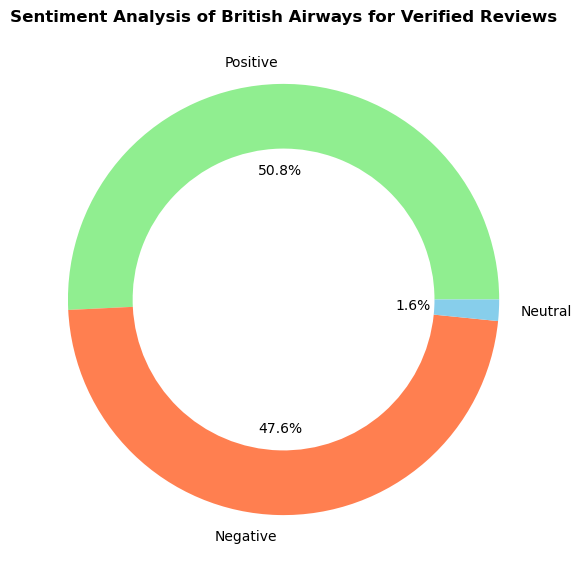

In [8]:
import matplotlib.pyplot as plt

# Create a doughnut chart
plt.figure(figsize=(10, 7))
colors = ['lightgreen', 'coral', 'skyblue']  # Define colors for each sentiment
filtered_df['Sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'width': 0.3}  # Adjust the width to create a hole in the center
)

# Add title as bold
plt.title('Sentiment Analysis of British Airways for Verified Reviews', fontweight='bold')
plt.axis('off')

# Display the chart
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
positive_reviews = filtered_df[filtered_df['Sentiment'] == 'Positive']
negative_reviews = filtered_df[filtered_df['Sentiment'] == 'Negative']
neutral_reviews = filtered_df[filtered_df['Sentiment'] == 'Neutral']

In [25]:

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Extend stop words
custom_stopwords = set(stopwords.words('english')).union({
    "flight", "overall", "flights", "plane", "airline", "airlines","Airway", "via", "generally",
    "BA", "ba", "British Airway", "British", "british", "great","many", "one", "two", "london", "get",
    "British Airways", "good", "also", "although", "well", "excellent", "even", "go", "however", "back",
    "u", "much", "nice", "ok", "would", "could", "class", "airway", "said", "really" ,"apparently"
})

custom_stopwords = list(custom_stopwords)

# Function to preprocess text (tokenize, lemmatize, and remove stopwords)
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in custom_stopwords]
    return " ".join(lemmatized)

# Apply preprocessing to reviews
positive_reviews["processed"] = positive_reviews["Review"].apply(preprocess_text)
negative_reviews["processed"] = negative_reviews["Review"].apply(preprocess_text)
neutral_reviews["processed"] = neutral_reviews["Review"].apply(preprocess_text)

# Function to compute TF-IDF scores
def compute_tfidf_for_reviews(reviews):
    vectorizer = TfidfVectorizer(stop_words=custom_stopwords, max_features=1000)
    matrix = vectorizer.fit_transform(reviews)
    features = vectorizer.get_feature_names_out()
    scores = np.asarray(matrix.mean(axis=0)).flatten()
    return dict(zip(features, scores))

# Compute TF-IDF for positive, negative, and neutral reviews
positive_tfidf = compute_tfidf_for_reviews(positive_reviews["processed"])
negative_tfidf = compute_tfidf_for_reviews(negative_reviews["processed"])
neutral_tfidf = compute_tfidf_for_reviews(neutral_reviews["processed"])

# Generate WordClouds for each sentiment
positive_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100, colormap='Greens',
    max_font_size=110
).generate_from_frequencies(positive_tfidf)

negative_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100, colormap='Reds',
    max_font_size=110
).generate_from_frequencies(negative_tfidf)

neutral_wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100, colormap='Blues',
    max_font_size=110
).generate_from_frequencies(neutral_tfidf)


/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_36531/1413910503.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews["processed"] = positive_reviews["Review"].apply(preprocess_text)
/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_36531/1413910503.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews["processed"] = negative_reviews["Review"].apply(preprocess_text)
/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_36531/1413910503.py:23: Setting

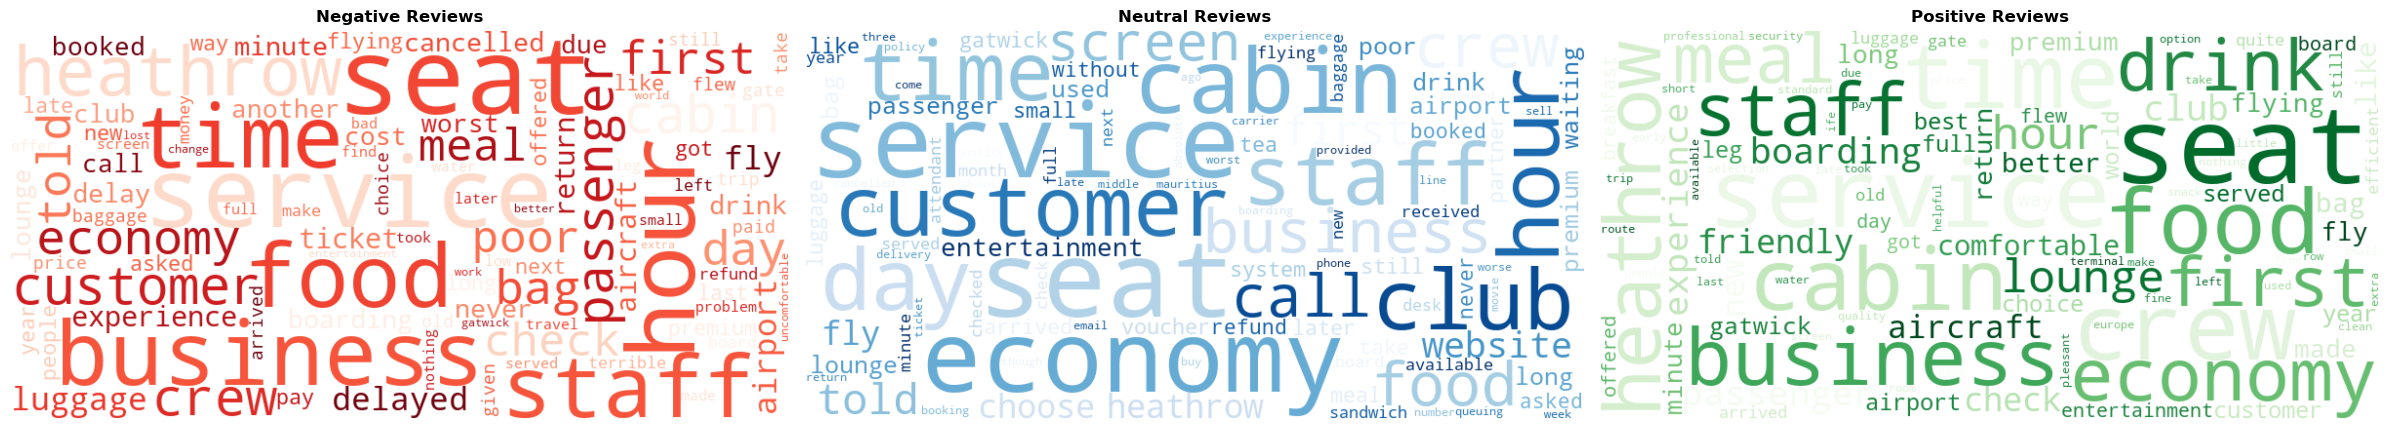

In [26]:
# Display all word clouds in one plot
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Positive WordCloud
axs[2].imshow(positive_wordcloud, interpolation='bilinear')
axs[2].axis('off')
axs[2].set_title('Positive Reviews', fontweight='bold')

# Negative WordCloud
axs[0].imshow(negative_wordcloud, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Negative Reviews', fontweight='bold')

# Neutral WordCloud
axs[1].imshow(neutral_wordcloud, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Neutral Reviews', fontweight='bold')

plt.tight_layout()
plt.show()


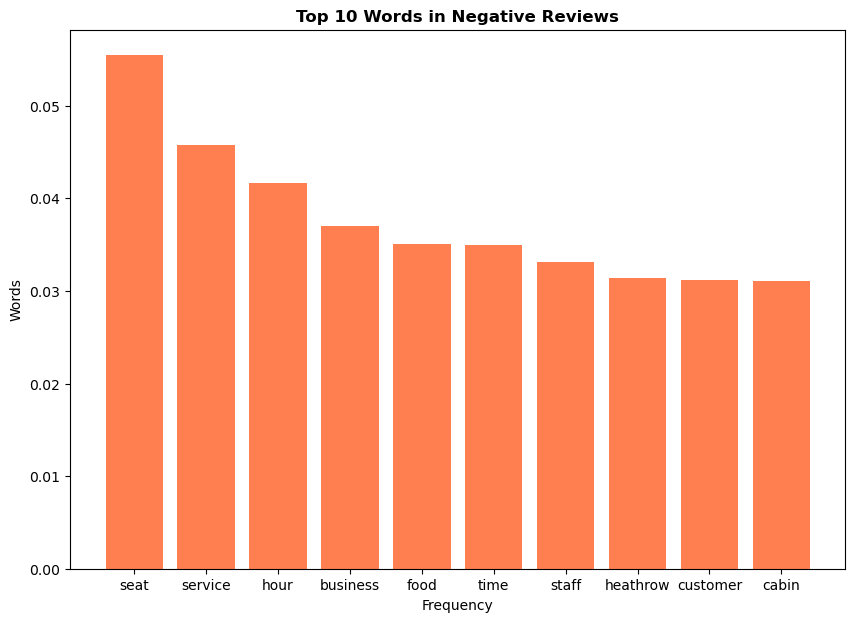

In [35]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

common_words_negative_v = Counter(negative_tfidf).most_common(10)
words, counts = zip(*common_words_negative_v)
plt.figure(figsize=(10, 7))
plt.bar(words, counts, color='coral')
plt.title('Top 10 Words in Negative Reviews', fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

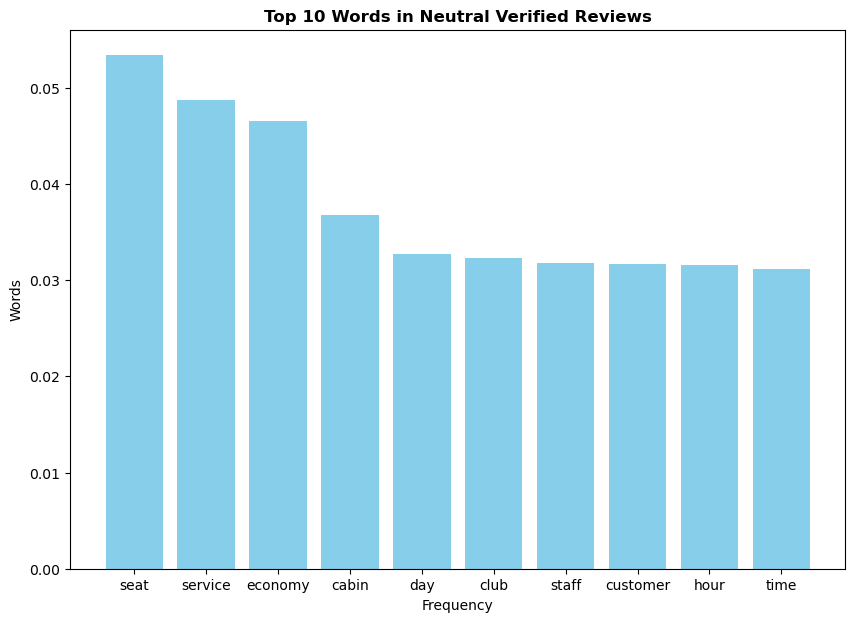

In [37]:
common_words_neutral_v = Counter(neutral_tfidf).most_common(10)
words, counts = zip(*common_words_neutral_v)
plt.figure(figsize=(10, 7))
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Words in Neutral Verified Reviews', fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

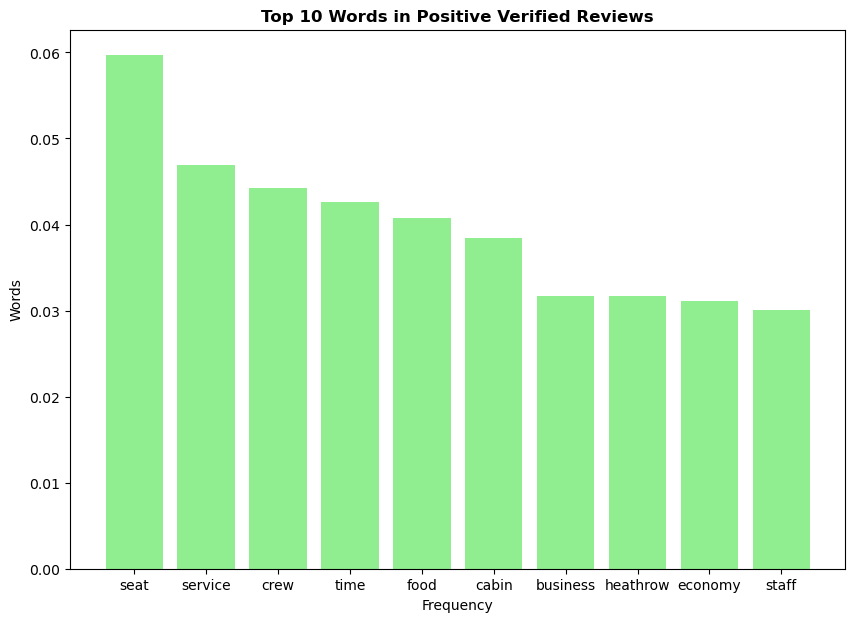

In [36]:
common_words_positive_v = Counter(positive_tfidf).most_common(10)
words, counts = zip(*common_words_positive_v)   
plt.figure(figsize=(10, 7))
plt.bar(words, counts, color='lightgreen')
plt.title('Top 10 Words in Positive Verified Reviews', fontweight='bold')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

--------

310


/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_36531/874990740.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unverified_reviews['Sentiment'] = unverified_reviews['Review'].apply(lambda x: sentiment_scores(x))


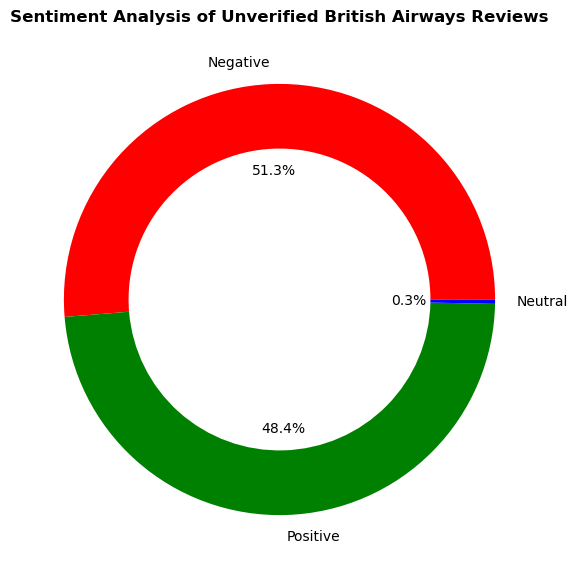

In [40]:
unverified_reviews = df[df['Status'].isin(["Not Verified", "❎ Unverified", "❎ Not Verified"])]
unverified_reviews['Sentiment'] = unverified_reviews['Review'].apply(lambda x: sentiment_scores(x))
print(len(unverified_reviews))
# Create a doughnut chart
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue']  # Define colors for each sentiment
unverified_reviews['Sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%',
    colors=colors,
    wedgeprops={'width': 0.3}  # Adjust the width to create a hole in the center
)
plt.title('Sentiment Analysis of Unverified British Airways Reviews', fontweight='bold')
plt.axis('off')
plt.show()

In [28]:
positive_reviews_unverified = unverified_reviews[unverified_reviews['Sentiment'] == 'Positive']
negative_reviews_unverified = unverified_reviews[unverified_reviews['Sentiment'] == 'Negative']
neutral_reviews_unverified = unverified_reviews[unverified_reviews['Sentiment'] == 'Neutral']

positive_reviews_unverified["processed"] = positive_reviews_unverified["Review"].apply(preprocess_text)
negative_reviews_unverified["processed"] = negative_reviews_unverified["Review"].apply(preprocess_text)
neutral_reviews_unverified["processed"] = neutral_reviews_unverified["Review"].apply(preprocess_text)

positive_tfidf_unverified = compute_tfidf_for_reviews(positive_reviews_unverified["processed"])
negative_tfidf_unverified = compute_tfidf_for_reviews(negative_reviews_unverified["processed"])
neutral_tfidf_unverified = compute_tfidf_for_reviews(neutral_reviews_unverified["processed"])

positive_wordcloud_unverified = WordCloud(width=800,
    height=400,
    background_color='white',
    max_words=100, colormap='Greens',
    max_font_size=110).generate_from_frequencies(positive_tfidf_unverified)

negative_wordcloud_unverified = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100, colormap='Reds',
    max_font_size=110
).generate_from_frequencies(negative_tfidf_unverified)

neutral_wordcloud_unverified = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100, colormap='Blues',
    max_font_size=110
).generate_from_frequencies(neutral_tfidf_unverified)


/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_36531/2092603917.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews_unverified["processed"] = positive_reviews_unverified["Review"].apply(preprocess_text)
/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T/ipykernel_36531/2092603917.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews_unverified["processed"] = negative_reviews_unverified["Review"].apply(preprocess_text)
/var/folders/5d/_9n1crjd57xf1l0_1_ng0vq80000gn/T

Text(0.5, 1.0, 'Neutral Reviews')

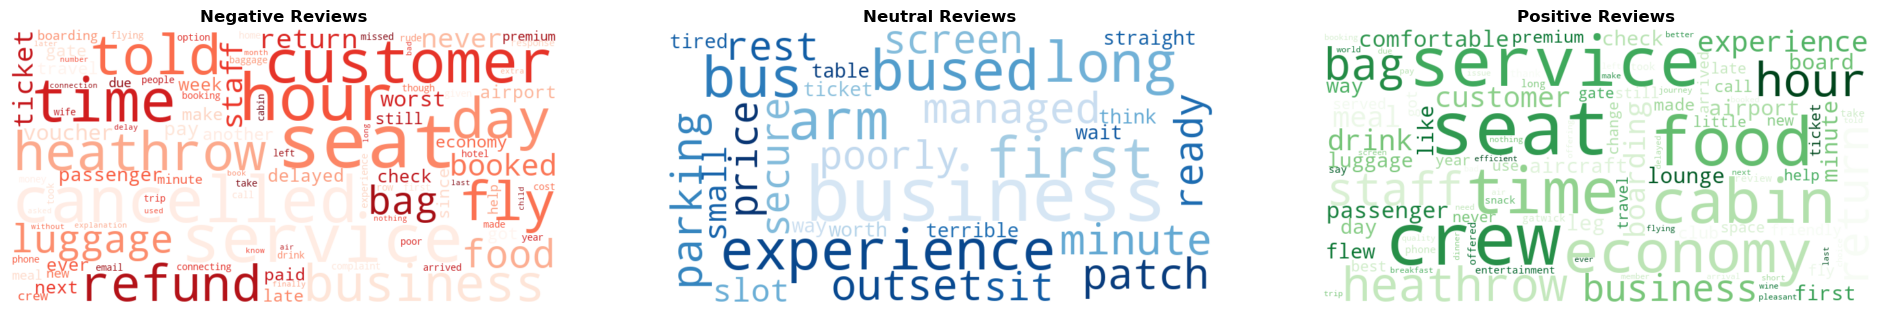

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(24, 8))

# Positive WordCloud
axs[2].imshow(positive_wordcloud_unverified, interpolation='bilinear')
axs[2].axis('off')
axs[2].set_title('Positive Reviews', fontweight='bold')

# Negative WordCloud
axs[0].imshow(negative_wordcloud_unverified, interpolation='bilinear')
axs[0].axis('off')
axs[0].set_title('Negative Reviews', fontweight='bold')

# Neutral WordCloud
axs[1].imshow(neutral_wordcloud_unverified, interpolation='bilinear')
axs[1].axis('off')
axs[1].set_title('Neutral Reviews', fontweight='bold')

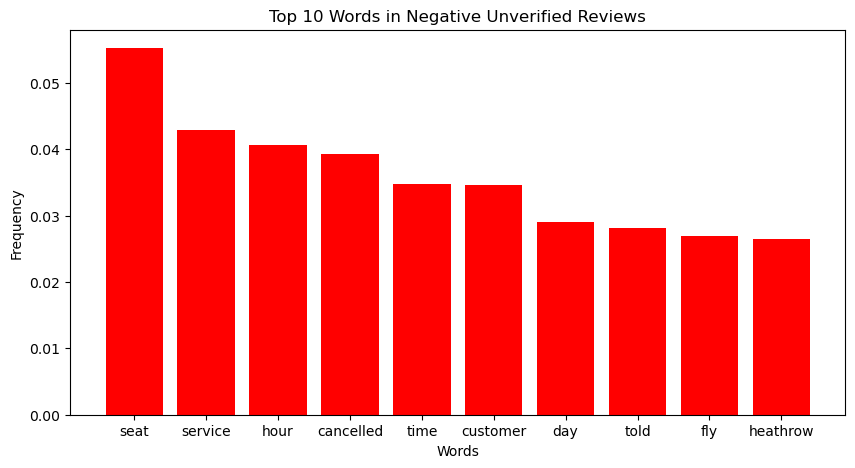

In [31]:
most_common_words_negative = Counter(negative_tfidf_unverified).most_common(10)
words, counts = zip(*most_common_words_negative)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='red')
plt.title('Top 10 Words in Negative Unverified Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

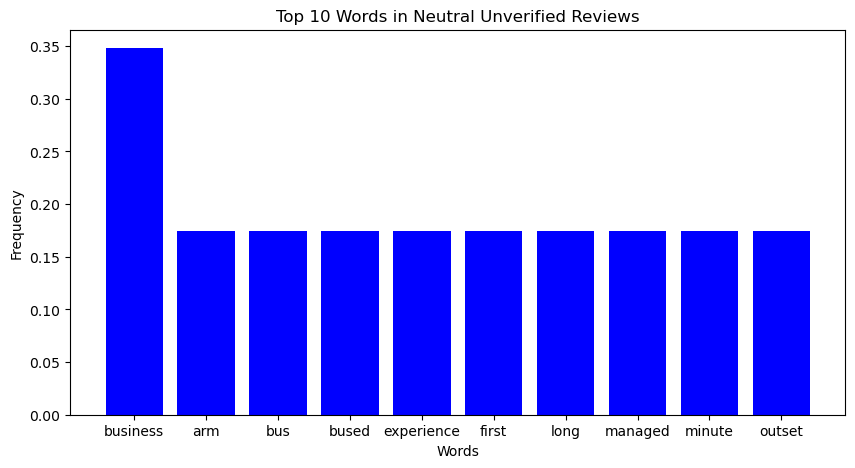

In [32]:
most_common_words_neutral = Counter(neutral_tfidf_unverified).most_common(10)
words, counts = zip(*most_common_words_neutral)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='blue')
plt.title('Top 10 Words in Neutral Unverified Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

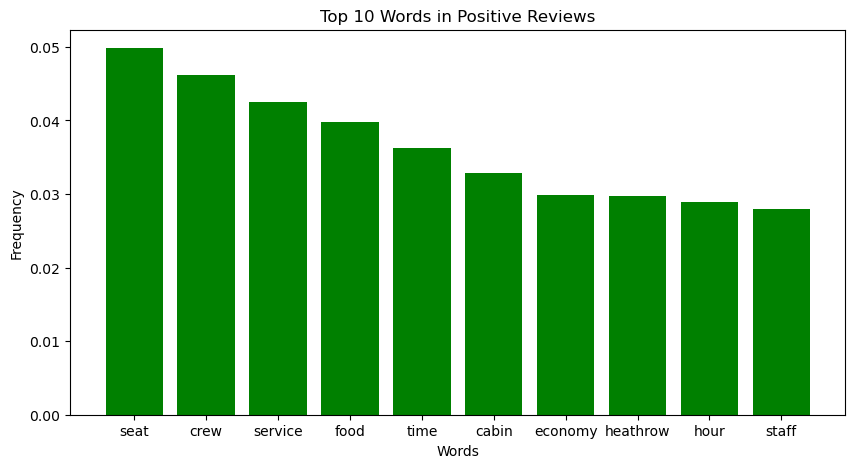

In [30]:
# Count word frequencies
word_freq = Counter(positive_tfidf_unverified)

# Display the top 10 most common words
most_common_words_positive = word_freq.most_common(10)

# Visualize word frequencies
import matplotlib.pyplot as plt

words, counts = zip(*most_common_words_positive)
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='green')
plt.title('Top 10 Words in Positive Unverified Reviews')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
